# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

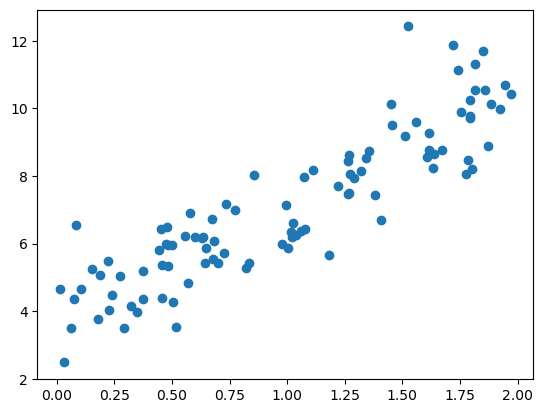

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [47]:
#X_fit[]

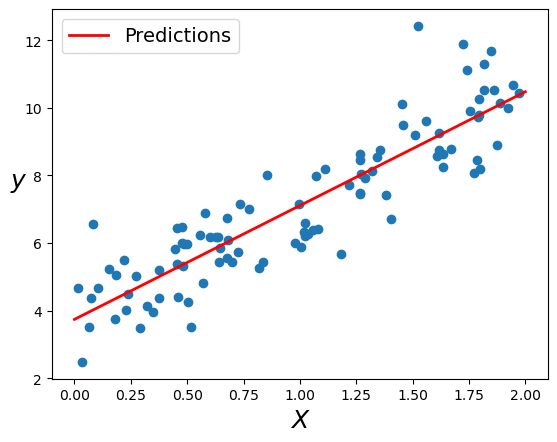

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

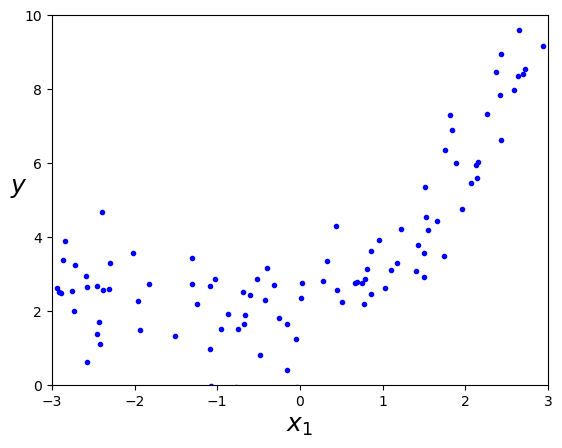

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

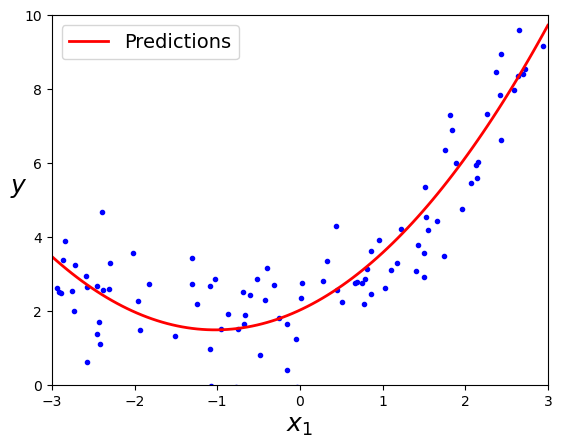

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [50]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
887,6.022948,37.286697
170,3.182915,45.496473
63,2.479723,59.129649
179,3.224625,41.447674
424,4.214040,33.951714
922,6.385253,30.902568
377,4.085876,44.449300
614,4.868221,40.618870
441,4.251257,40.071950
530,4.537264,35.512017


In [51]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [52]:
len(X)

1000

In [53]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

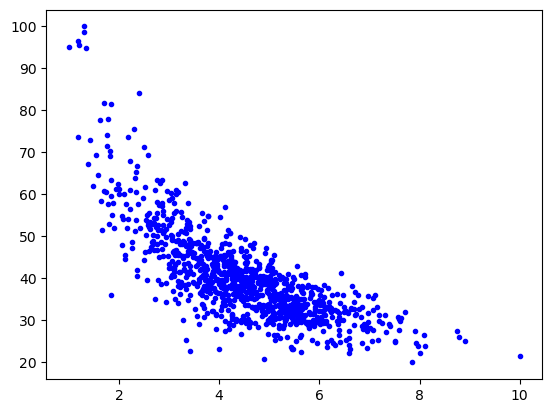

In [27]:
plt.plot(X,y,'b.')

In [38]:
#lineal

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X,y)

LinearRegression()

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [55]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train,y_train)

LinearRegression()

In [56]:
linear_reg.coef_

array([-6.21850698])

In [57]:
linear_reg.intercept_

67.89012908512076

In [42]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2_score',r2_score(y, y_pred))

Error medio Absoluto (MAE): 139686.5273373469
Root Mean Squared Error: 216029.37463814966
r2_score 0.6537318108687113


/Users/abrahamrt/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


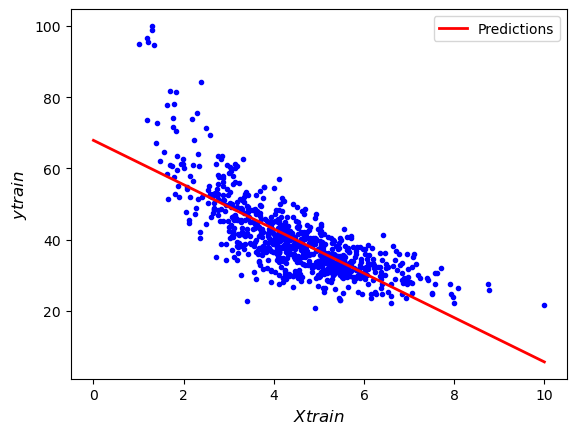

In [60]:
# construct best fit line

# construct best fit line
X_fit = np.linspace(0, 10, 200)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.plot(X_train, y_train, "b.")
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X train$", fontsize=12)
plt.ylabel("$y train$", rotation=90, fontsize=12)
plt.legend(loc="upper right", fontsize=10);


In [62]:
from sklearn import metrics
from sklearn.metrics import r2_score

y_pred = linear_reg.predict(X_test)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 4.513943834797746
Root Mean Squared Error: 5.932738736518162
r2_score 0.5695897011831417


In [64]:
#polinomial

poly_transform = PolynomialFeatures(degree=2, include_bias = False)
Xpoly = poly_transform.fit_transform(X_train)

Xpoly

array([[ 1.86522775,  3.47907457],
       [ 4.54842911, 20.68820735],
       [ 5.11287348, 26.14147523],
       ...,
       [ 5.85509721, 34.2821633 ],
       [ 4.24212411, 17.99561697],
       [ 2.79408325,  7.80690121]])

In [65]:
poli_reg = LinearRegression(fit_intercept=True)

poli_reg.fit(Xpoly, y_train)




LinearRegression()

In [68]:
poli_reg.coef_

array([-17.81636965,   1.27181952])

In [69]:
poli_reg.intercept_

92.0358203494912

In [71]:
y_pred = poli_reg.predict(Xpoly)

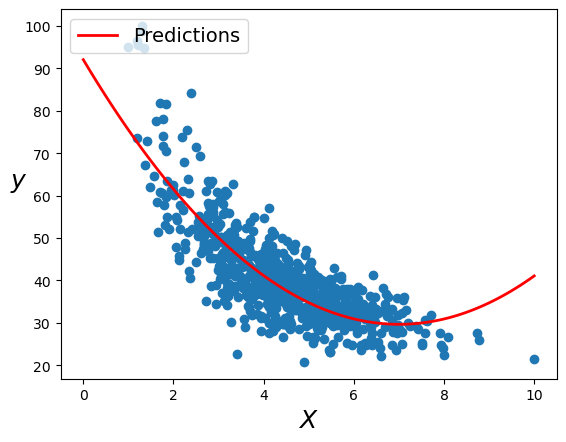

In [73]:
Xfit = np.linspace(0, 10, 100).reshape(100,1)
poliX_fit = poly_transform.fit_transform(Xfit)
poliX_fit
yfit = poli_reg.predict(poliX_fit)

plt.scatter(X_train, y_train)
plt.plot(Xfit, yfit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [77]:
Xtestpoli = poly_features.transform(X_test)

/Users/abrahamrt/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [78]:
y_pred = poli_reg.predict(Xtestpoli)

In [79]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))







Error medio Absoluto (MAE): 4.372292708304973
Root Mean Squared Error: 5.764249049866789
r2_score 0.5936898412489064


Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook). Regresión Lineal. Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada. Regresión Polinomial. Realiza la regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada. Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada. Finalmente grafica : MAE (de los cuatro métodos) R2 (de los cuatro métodos) Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

In [118]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
521,4.518689,38.634483
737,5.284690,33.233497
740,5.292696,34.550609
660,5.030596,34.982985
411,4.182289,43.090662
678,5.077623,29.087582
626,4.925292,39.152161
513,4.483809,41.780157
859,5.853092,36.344797
136,3.049856,54.462176


In [119]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [120]:
# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)


In [121]:
X_train.shape

(800, 1)

In [122]:
y_train.shape

(800,)

In [123]:
linear = LinearRegression(fit_intercept=True)
linear.fit(X_train, y_train)

LinearRegression()

/Users/abrahamrt/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


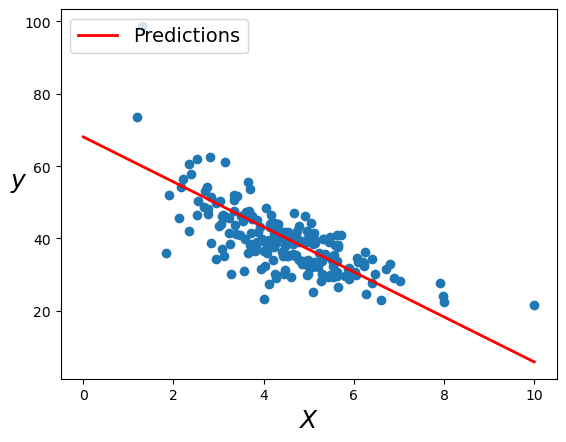

In [124]:

#Entrenamos

X_fit = np.linspace(0, 10, 100)
y_fit = linear.predict(X_fit[:, np.newaxis])

plt.scatter(X_test, y_test)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [125]:
linear.coef_

array([-6.22263745])

In [126]:
linear.intercept_

68.08187672497846

In [127]:
y_pred = linear.predict(X_test)
linear_Mae = metrics.mean_absolute_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score', r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 4.833241143988721
Root Mean Squared Error: 6.668203882750842
r2_score 0.48439969577999353


El conglomerado de datos, en el centro de la grafica, combinado con los malos metricos resultantes nos indican que el modelo de regresion lineal no es un buen candidato.

In [128]:
# Regresion Polimomial


poli_transform = PolynomialFeatures(degree=3, include_bias = False)
poliX = poli_transform.fit_transform(X_train)
poliX



array([[  5.65669179,  31.99816198, 181.00374013],
       [  5.53635996,  30.65128163, 169.69652839],
       [  2.25713058,   5.09463847,  11.49926431],
       ...,
       [  2.64655085,   7.00423138,  18.53705446],
       [  5.18000789,  26.83248172, 138.99246696],
       [  6.37652342,  40.66005096, 259.26976735]])

In [129]:
poli_regression = LinearRegression(fit_intercept=True)
poli_regression.fit(poliX, y_train)

LinearRegression()

In [130]:
poli_regression.coef_

array([-35.3746951 ,   5.28612952,  -0.28112892])

In [131]:
poli_regression.intercept_

115.22180379591063

In [132]:
y_pred = poli_regression.predict(poliX)

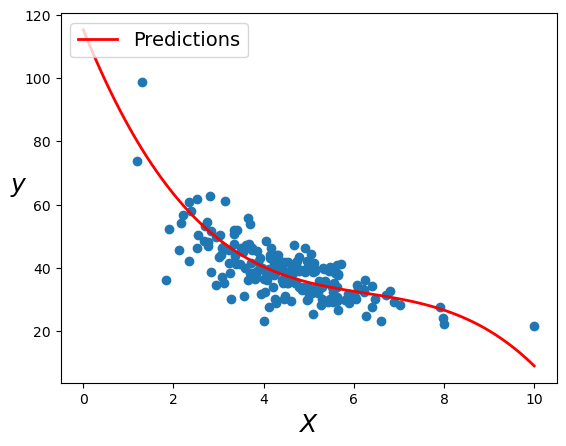

In [133]:
X_fit = np.linspace(0, 10, 100).reshape(100,1)
poliX_fit = poli_transform.fit_transform(X_fit)
poliX_fit
y_fit = poli_regression.predict(poliX_fit)

plt.scatter(X_test, y_test)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [134]:
poli_transform = PolynomialFeatures(degree=3, include_bias = False)
poliX = poli_transform.fit_transform(X_test)
y_pred = poli_regression.predict(poliX)

In [135]:

Poly_Mae = metrics.mean_absolute_error(y_test, y_pred)
Poly_r2 = r2_score(y_test, y_pred )


print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 4.6058129615114
Root Mean Squared Error: 6.209999522706197
r2_score 0.5528239263527264


Ridge

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
np.random.seed(42)

In [137]:
X_train2=X_train.to_numpy().reshape(-1,1)

In [138]:
modelo = Pipeline([("poli_features", PolynomialFeatures(degree=2, include_bias=False)),
                  ("Scaler", StandardScaler()),
                  ("linear_reg", LinearRegression())])
modelo.fit(X_train, y_train)

Pipeline(steps=[('poli_features', PolynomialFeatures(include_bias=False)),
                ('Scaler', StandardScaler()),
                ('linear_reg', LinearRegression())])

In [139]:
y_pred = modelo.predict(X_test)

In [140]:
order = np.argsort(X_test.values.ravel())
X_test2 = X_test.values.ravel()[order]
y_test2 = y_test.values[order]
y_pred2 = y_pred[order]

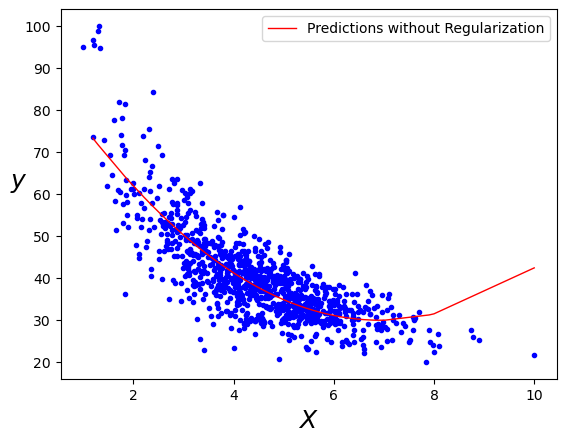

In [141]:
plt.plot(X, y, "b.")
plt.plot(X_test2, y_pred2, "r-", linewidth=1, label="Predictions without Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

In [142]:
from sklearn.linear_model import Ridge

modelo_ridge = Pipeline([("poli_features", PolynomialFeatures(degree=3, include_bias=False)),
                  ("Scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 10, solver = 'cholesky', random_state = 42))])
modelo_ridge.fit(X_train, y_train)

Pipeline(steps=[('poli_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('Scaler', StandardScaler()),
                ('ridge', Ridge(alpha=10, random_state=42, solver='cholesky'))])

In [143]:
y_pred = modelo_ridge.predict(X_test)
order = np.argsort(X_test.values.ravel())
X_test2 = X_test.values.ravel()[order]
y_test2 = y_test.values[order]
y_pred2 = y_pred[order]

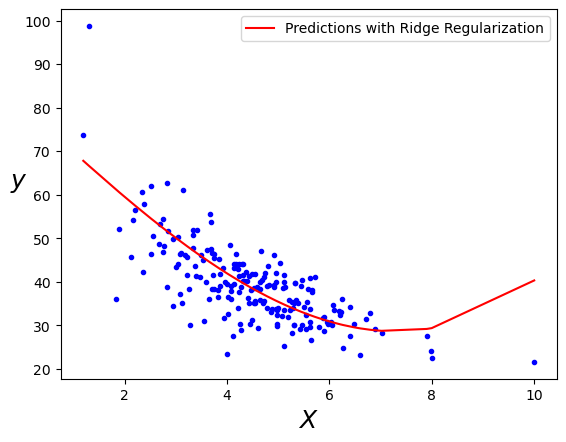

In [144]:
plt.plot(X_test, y_test, "b.")
plt.plot(X_test2, y_pred2, "r-",label="Predictions with Ridge Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

In [145]:


Ridge_Mae = metrics.mean_absolute_error(y_test, y_pred)
Ridge_r2 = r2_score(y_test, y_pred )
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 4.711938540686241
Root Mean Squared Error: 6.463399871996694
r2_score 0.5155851196679577


Lasso

In [146]:
from sklearn.linear_model import Lasso

modelo_lasso = Pipeline([("poli_features", PolynomialFeatures(degree=3, include_bias=False)),
                        ("Scaler", StandardScaler()),
                        ("lasso", Lasso(alpha = 0.0001, random_state = 42))])
modelo_lasso.fit(X_train, y_train)

/Users/abrahamrt/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.362e+04, tolerance: 9.470e+00
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('poli_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('Scaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.0001, random_state=42))])

In [147]:
y_pred = modelo_lasso.predict(X_test)

In [148]:
order = np.argsort(X_test.values.ravel())
X_test2 = X_test.values.ravel()[order]
y_test2 = y_test.values[order]
y_pred2 = y_pred[order]

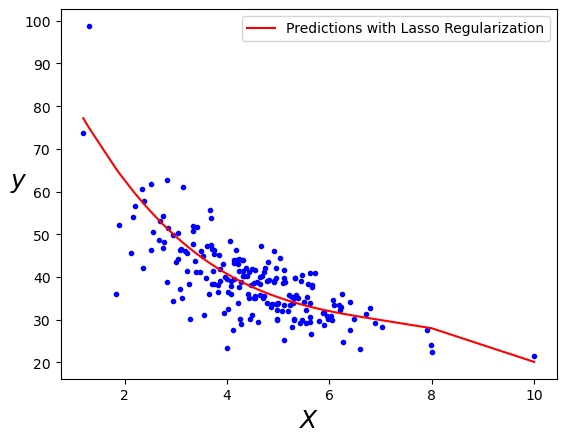

In [149]:
plt.plot(X_test, y_test, "b.")
plt.plot(X_test2, y_pred2, "r-",label="Predictions with Lasso Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

In [151]:

Lasso_mae = metrics.mean_absolute_error(y_test, y_pred)
Lasso_r2 = r2_score(y_test, y_pred )

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 4.563257381820652
Root Mean Squared Error: 6.173935044214329
r2_score 0.5580027810942358


In [152]:
Metricas = list()
Metricas.append('Lin')
Metricas.append('Poly')
Metricas.append('Ridge')
Metricas.append('Lasso')

In [154]:
MAE = list()
MAE.append(linear_Mae)
MAE.append(Poly_Mae)
MAE.append(Ridge_Mae)
MAE.append(Lasso_mae)

MAE
[4.833241143988721, 4.6058129615114, 4.711938540686241, 4.563257381820652]


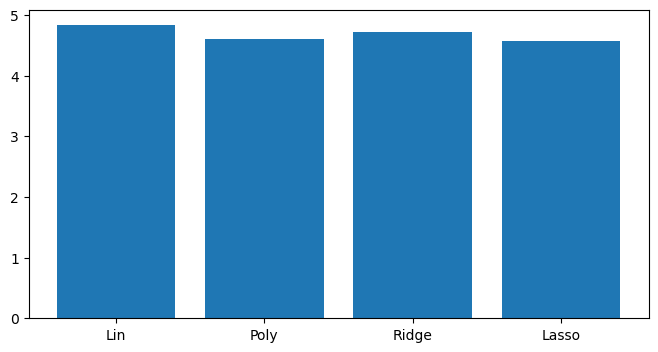

In [155]:
fig, ax = plt.subplots(figsize =(8, 4))
print("MAE")
print(MAE)
Metricas=list(Metricas)
MAE=list(MAE)
plt.bar(Metricas,MAE)


plt.show()

In [156]:
R2 = list()
R2.append(linear_r2)
R2.append(Poly_r2)
R2.append(Ridge_r2)
R2.append(Lasso_r2)

r2
[0.48439969577999353, 0.5528239263527264, 0.5155851196679577, 0.5580027810942358]


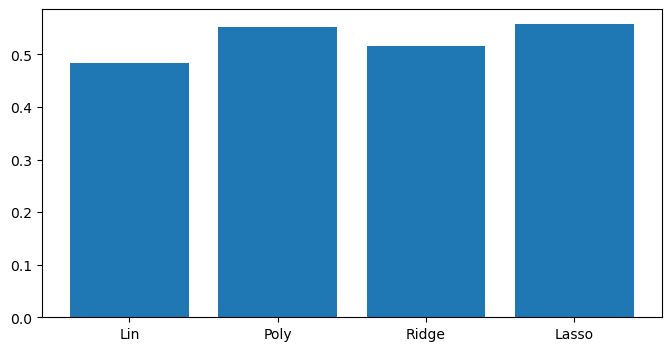

In [158]:
fig, ax = plt.subplots(figsize =(8, 4))
print("r2")
print(R2)
R2=list(R2)
plt.bar(Metricas,R2)


plt.show()

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [175]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16904,1725059259,20141125T000000,437500.0,3,1.00,1630,16393,1.0,0,0,...,7,1630,0,1969,0,98033,47.6576,-122.186,1880,23497
15620,2225079030,20141212T000000,180000.0,2,1.00,960,87991,1.5,0,0,...,5,960,0,1946,0,98014,47.6300,-121.900,1940,392040
19593,421059018,20141104T000000,257000.0,3,1.75,1397,18000,1.0,0,0,...,7,1397,0,1965,2014,98092,47.3388,-122.166,1950,31294
10500,7202350310,20141028T000000,476000.0,3,2.25,1630,3070,2.0,0,0,...,7,1630,0,2004,0,98053,47.6785,-122.030,1690,3200
4988,5710500010,20140610T000000,490000.0,3,2.00,2220,10275,2.0,0,0,...,9,1640,580,1980,0,98027,47.5304,-122.055,2300,9975
19215,4131900042,20140516T000000,2000000.0,5,4.25,6490,10862,2.0,0,3,...,11,3940,2550,1991,0,98040,47.5728,-122.205,3290,14080
11964,5272200045,20141113T000000,378000.0,3,1.50,1000,6914,1.0,0,0,...,7,1000,0,1947,0,98125,47.7144,-122.319,1000,6947
1159,6064800710,20141002T000000,315000.0,3,2.50,1570,2865,2.0,0,0,...,7,1570,0,2003,0,98118,47.5412,-122.288,1610,2582
17712,2929600035,20140627T000000,410000.0,3,1.00,2710,19000,2.0,0,3,...,7,2710,0,1950,0,98166,47.4462,-122.359,2150,19000
14892,3972300169,20141125T000000,195000.0,2,1.00,720,9520,1.0,0,0,...,6,720,0,1947,0,98155,47.7678,-122.316,1450,8612


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [177]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [178]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


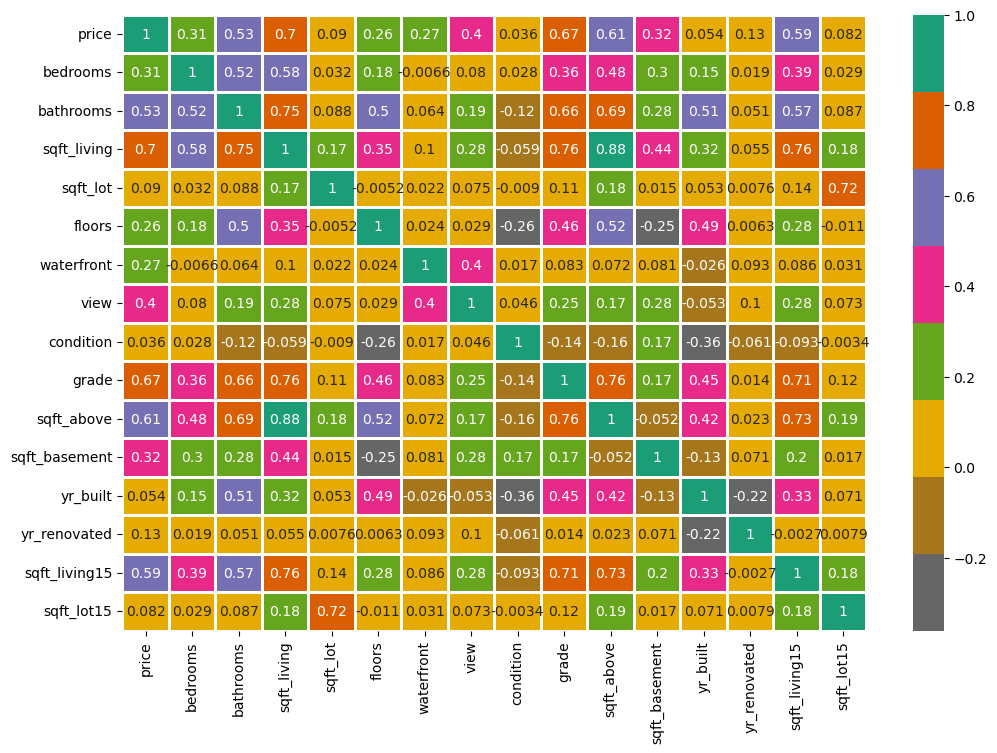

In [179]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [180]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [182]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

In [183]:
linear_reg.intercept_

array([6151359.26274115])

In [184]:
y_pred = linear_reg.predict(X_test)

linear_mae=metrics.mean_absolute_error(y_test,y_pred)
linear_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score', r2_score(y_test, y_pred))


Error medio Absoluto (MAE): 137480.13882731184
Root Mean Squared Error: 232133.36762408746
r2_score 0.6579723205007443


In [185]:
poli_transform = PolynomialFeatures(degree=3, include_bias = False)
poliX = poli_transform.fit_transform(X_train)
poliX

array([[5.00000000e+00, 2.75000000e+00, 3.75000000e+03, ...,
        7.06230720e+10, 1.64221278e+11, 3.81867106e+11],
       [4.00000000e+00, 4.50000000e+00, 5.25000000e+03, ...,
        3.02200000e+11, 5.84478976e+12, 1.13042910e+14],
       [3.00000000e+00, 2.50000000e+00, 2.88000000e+03, ...,
        9.21194624e+10, 3.27210820e+11, 1.16226168e+12],
       ...,
       [3.00000000e+00, 2.25000000e+00, 1.78000000e+03, ...,
        1.73857625e+10, 8.77923438e+10, 4.43322266e+11],
       [2.00000000e+00, 1.00000000e+00, 1.15000000e+03, ...,
        9.24639408e+09, 2.73030912e+10, 8.06215680e+10],
       [3.00000000e+00, 1.00000000e+00, 1.45000000e+03, ...,
        8.37158400e+09, 6.23039040e+10, 4.63684824e+11]])

In [186]:
poli_regression = LinearRegression(fit_intercept=True)
poli_regression.fit(poliX, y_train)

LinearRegression()

In [187]:
poli_regression.coef_

array([[-2.61761166e+02, -1.55869087e+02,  6.32972451e+01,
        -1.09008961e+01,  4.41081406e+00, -1.86506286e+00,
        -3.34216437e-01,  1.76072826e-01,  2.54411630e-01,
         3.90889152e+00,  1.29018995e+00, -1.29186035e-01,
         8.63416346e-02,  1.72610892e+00, -1.12927619e+01,
         7.61155366e-01, -1.50692075e-01, -4.44253135e+00,
        -4.87123194e+00, -3.18801098e-01, -8.81322684e-02,
        -1.36279839e-01,  1.04732076e+00,  1.00500569e+00,
        -8.45396347e+00,  4.01064938e+00,  3.53222531e+02,
         3.67315202e+00, -9.50951071e+00, -2.40985502e+01,
        -2.64704337e-01, -1.27822027e+02, -5.83165380e+01,
        -4.30167458e-01, -5.88432348e-02, -7.40562705e-02,
        -4.69740512e-02, -3.33553023e-01, -1.04364590e+02,
        -2.34573227e+01, -1.08429160e+02, -2.46269185e+00,
        -1.05467365e+02,  8.62305205e+01, -3.83503383e-01,
         2.91016475e-02, -3.17708531e+02, -2.01582258e+01,
        -5.67576203e+01,  1.34208578e+02,  1.09252685e+0

In [188]:
poliX = poli_transform.fit_transform(X_test)
poliX
y_pred = poli_regression.predict(poliX)

In [189]:
Poly_mae=metrics.mean_absolute_error(y_test,y_pred)
Poly_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 148002.97899708702
Root Mean Squared Error: 262611.5526195036
r2_score 0.5622624883130176


Ridge

In [190]:
X_train2=X_train.to_numpy().reshape(-1,1)

In [192]:
modelo = Pipeline([("Poli_features", PolynomialFeatures(degree=2, include_bias=False)),
                  ("Scaler", StandardScaler()),
                  ("linear_reg", LinearRegression())])
modelo.fit(X_train, y_train)

Pipeline(steps=[('Poli_features', PolynomialFeatures(include_bias=False)),
                ('Scaler', StandardScaler()),
                ('linear_reg', LinearRegression())])

In [194]:
modelo_ridge = Pipeline([("Poli_features", PolynomialFeatures(degree=5, include_bias=False)),
                  ("Scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 5, solver = 'cholesky', random_state = 42))])
modelo_ridge.fit(X_train, y_train)

Pipeline(steps=[('Poli_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('Scaler', StandardScaler()),
                ('ridge', Ridge(alpha=5, random_state=42, solver='cholesky'))])

In [195]:
y_pred = modelo_ridge.predict(X_test)

In [196]:
Ridge_mae=metrics.mean_absolute_error(y_test,y_pred)
Ridge_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 135505.31846200227
Root Mean Squared Error: 316603.6497151816
r2_score 0.3637644320943827


Lasso

In [199]:
modelo_lasso = Pipeline([("Poli_features", PolynomialFeatures(degree=5, include_bias=False)),
                        ("Scaler", StandardScaler()),
                        ("lasso", Lasso(alpha = 1, random_state = 42,tol=0.1,max_iter=1000))])


modelo_lasso.fit(X_train, y_train)

Pipeline(steps=[('Poli_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('Scaler', StandardScaler()),
                ('lasso', Lasso(alpha=1, random_state=42, tol=0.1))])

In [200]:
y_pred = modelo_lasso.predict(X_test)

In [201]:
Lasso_mae=metrics.mean_absolute_error(y_test,y_pred)
Lasso_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 127385.85985379231
Root Mean Squared Error: 254950.23977556493
r2_score 0.5874306511507248


In [202]:
Metricas = list()
Metricas.append('Lin')
Metricas.append('Poly')
Metricas.append('Ridge')
Metricas.append('Lasso')

In [203]:
MAE = list()
MAE.append(linear_mae)
MAE.append(Poly_mae)
MAE.append(Ridge_mae)
MAE.append(Lasso_mae)

MAE
[137480.13882731184, 148002.97899708702, 135505.31846200227, 127385.85985379231]


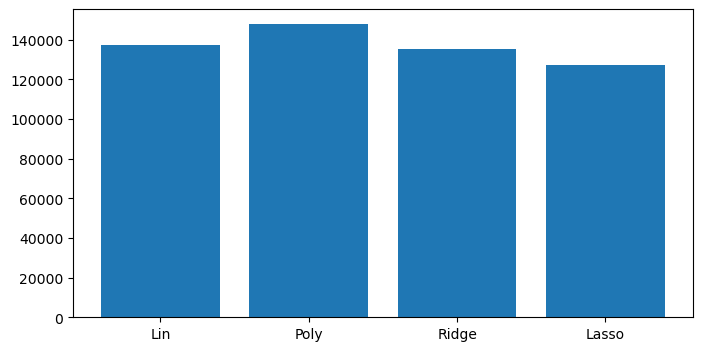

In [204]:
fig, ax = plt.subplots(figsize =(8, 4))
print("MAE")
print(MAE)
Metricas=list(Metricas)
MAE=list(MAE)
plt.bar(Metricas,MAE)


plt.show()

In [205]:
R2 = list()
R2.append(linear_r2)
R2.append(Poly_r2)
R2.append(Ridge_r2)
R2.append(Lasso_r2)

r2
[0.6579723205007443, 0.5622624883130176, 0.3637644320943827, 0.5874306511507248]


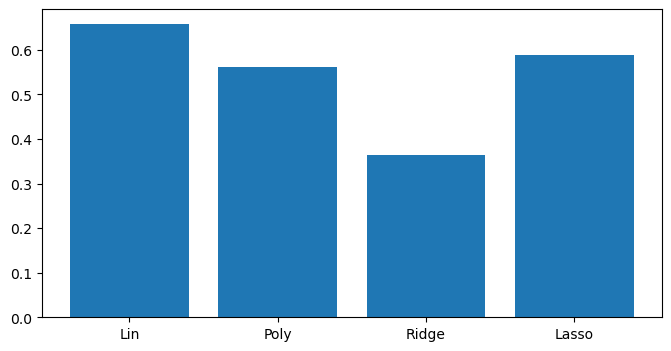

In [206]:
fig, ax = plt.subplots(figsize=(8, 4))
print("r2")
print(R2)
R2 = list(R2)
plt.bar(Metricas, R2)

plt.show()